<a href="https://colab.research.google.com/github/swordman08/HousingCA/blob/main/MGSC410_CA_HOUSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = ('lotwize_case.xlsx')





df = pd.read_excel('lotwize_case.xlsx')

df_new = pd.read_csv('DistanceToParksApi.csv')
df_new1 = pd.read_csv('DistanceToCityApi.csv')
df_mall = pd.read_csv('DistanceToMalls.csv')
df_walk_scores = pd.read_csv('unique_cities_list.csv')

df['distance_to_parksKM'] = df_new['distance_kilometers']
df['distance_to_city'] = df_new1['distance_meters']
df['distance_to_mall'] = df_mall
df_walk_scores.columns = ['City', 'Walk_Score']

df['walk_score'] = df['address/city'].map(df_walk_scores.set_index('City')['Walk_Score'])



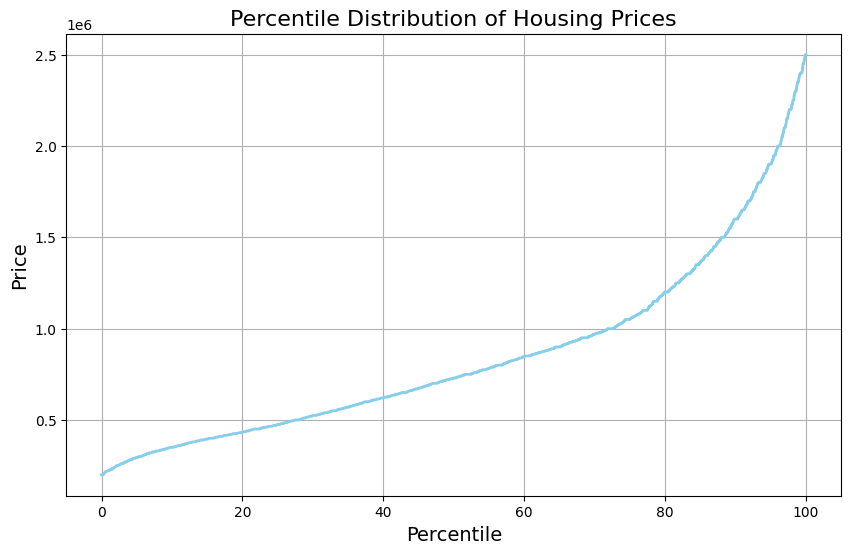

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Sort the price column to calculate percentiles
sorted_prices = np.sort(df['price'])

# Generate percentile values (from 0 to 100)
percentiles = np.linspace(0, 100, len(sorted_prices))

# Plot the price against percentiles
plt.figure(figsize=(10, 6))
plt.plot(percentiles, sorted_prices, color='skyblue', linewidth=2)
plt.title('Percentile Distribution of Housing Prices', fontsize=16)
plt.xlabel('Percentile', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()


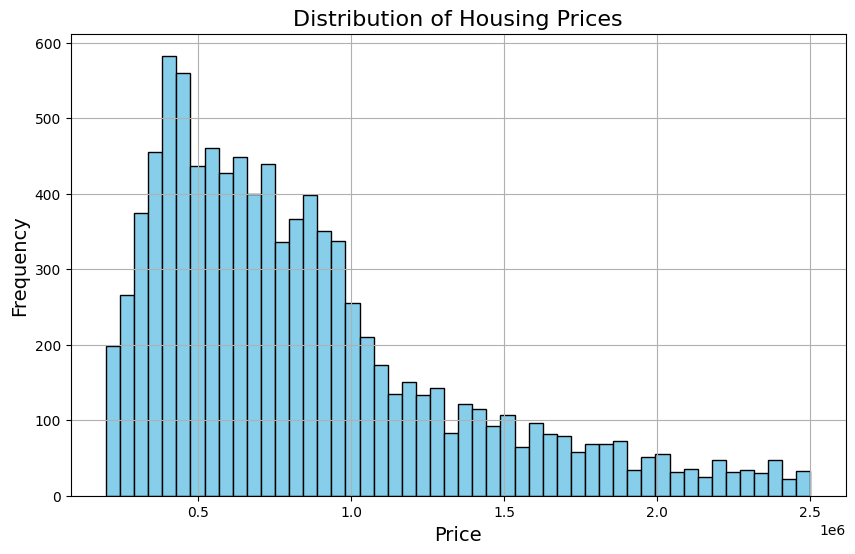

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of house prices from the DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Housing Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:


updated_columns = [

    'resoFacts/bedrooms',
    'resoFacts/bathrooms',
    'resoFacts/parkingCapacity',
    'resoFacts/yearBuilt',
    'price',
    'livingArea',
    'distance_to_parksKM',
    'distance_to_city',
    'distance_to_mall',
    'walk_score',
    'resoFacts/hasView',
    'resoFacts/hasSpa',
    'photoCount'

]

# Filter the dataframe with the updated columns
final_data = df[updated_columns]





# Recalculate the lower and upper bounds based on quantiles
lower_bound = final_data['price'].quantile(0.01)
upper_bound = final_data['price'].quantile(0.90)

# Filter out the bottom 1% and top 10% of price data
filtered_data = final_data[(final_data['price'] > lower_bound) & (final_data['price'] < upper_bound)]

# Display the shape
filtered_data.shape






(8549, 13)

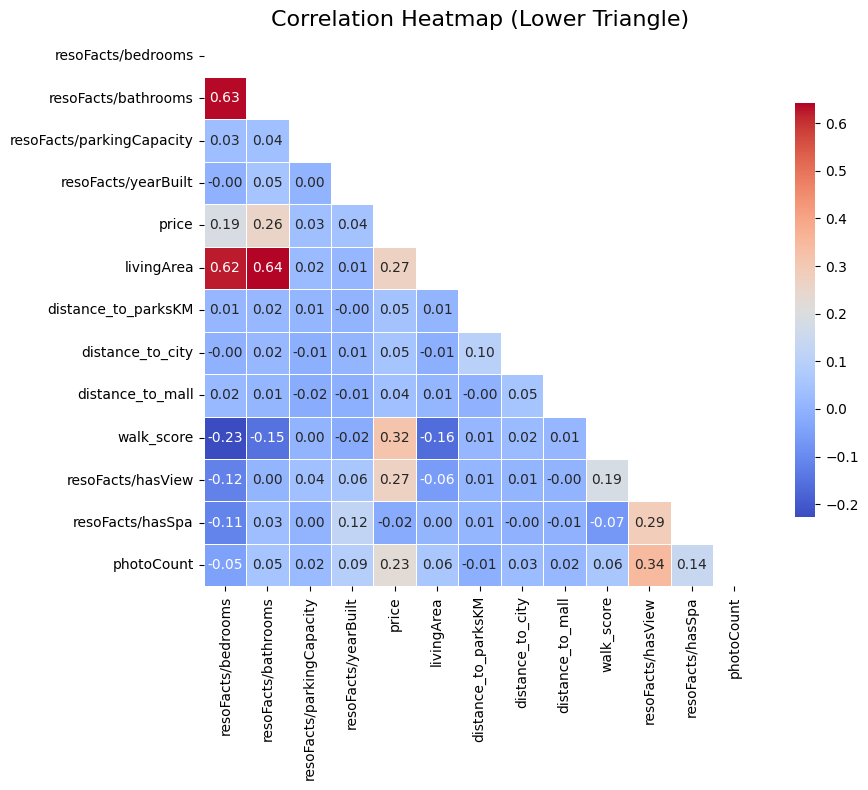

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Specify the columns of interest
columns_of_interest = [
    'resoFacts/bedrooms',
    'resoFacts/bathrooms',
    'resoFacts/parkingCapacity',
    'resoFacts/yearBuilt',
    'price',
    'livingArea',
    'distance_to_parksKM',
    'distance_to_city',
    'distance_to_mall',
    'walk_score',
    'resoFacts/hasView',
    'resoFacts/hasSpa',
    'photoCount'
]

# Create the correlation matrix for the specified columns
corr_matrix = filtered_data[columns_of_interest].corr()

# Create a mask to hide the upper triangle (including the diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a seaborn heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": .75})

# Add title
plt.title('Correlation Heatmap (Lower Triangle)', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import StandardScaler

#loads in preprocessed data set "FinalDataSet.csv" (for Professor Frenzels Easy Replication of results)
filtered_data = pd.read_csv('FinalDataSet.csv')


X = filtered_data.drop(columns=['price'])
y = filtered_data['price']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



#used gridsearchv

xgboost_model = XGBRegressor(
    subsample=.8,
    n_estimators=400,
    max_depth=6,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=.8,
    reg_alpha=.1,  # L1 regularization
    reg_lambda=.1, # L2 regularization
    random_state=42
)




xgboost_model.fit(X_train, y_train)


# Predictions
y_train_pred = xgboost_model.predict(X_train)
y_test_pred = xgboost_model.predict(X_test)

# Calculate RMSE for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = train_mse ** 0.5
test_rmse = test_mse ** 0.5

# Calculate R-squared for train and test sets
train_r2 = xgboost_model.score(X_train, y_train)
test_r2 = xgboost_model.score(X_test, y_test)

train_rmse, test_rmse, train_r2, test_r2



(56147.34596996611, 212563.7672026787, 0.984713613986969, 0.7827440500259399)

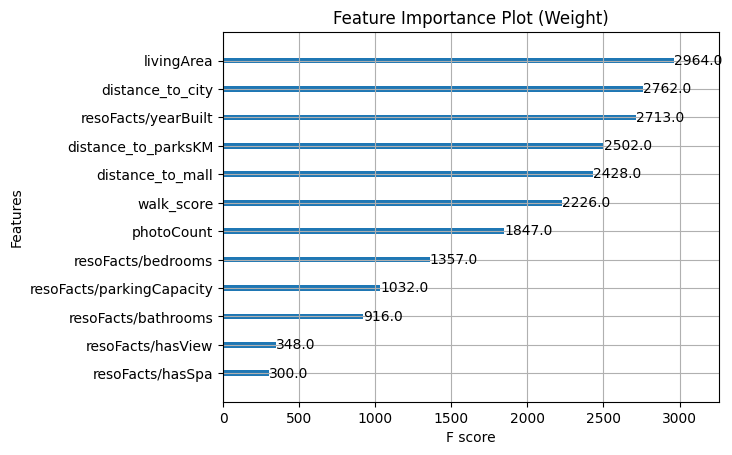

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(xgboost_model, importance_type='weight')
plt.title('Feature Importance Plot (Weight)')
plt.show()

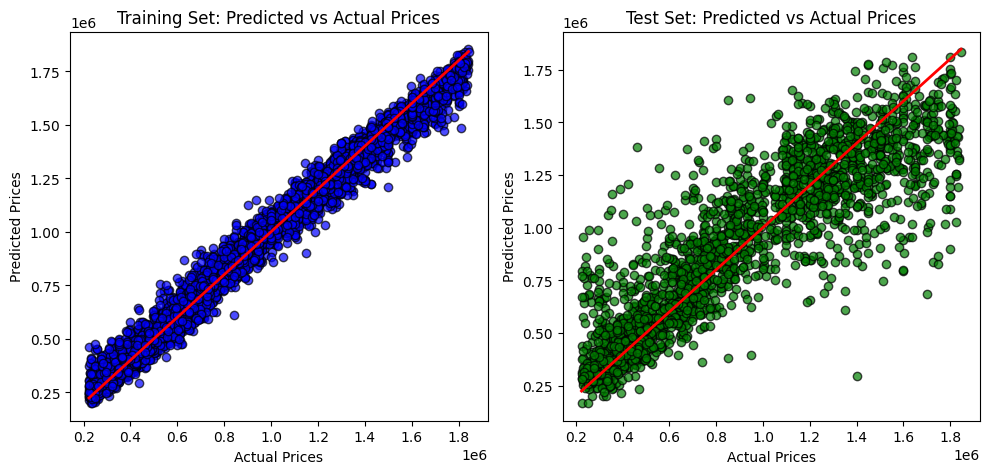

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual for training set
plt.figure(figsize=(10, 5))

# Plot for training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color="blue", edgecolors="k", alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Training Set: Predicted vs Actual Prices")

# Plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color="green", edgecolors="k", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Set: Predicted vs Actual Prices")

plt.tight_layout()
plt.show()

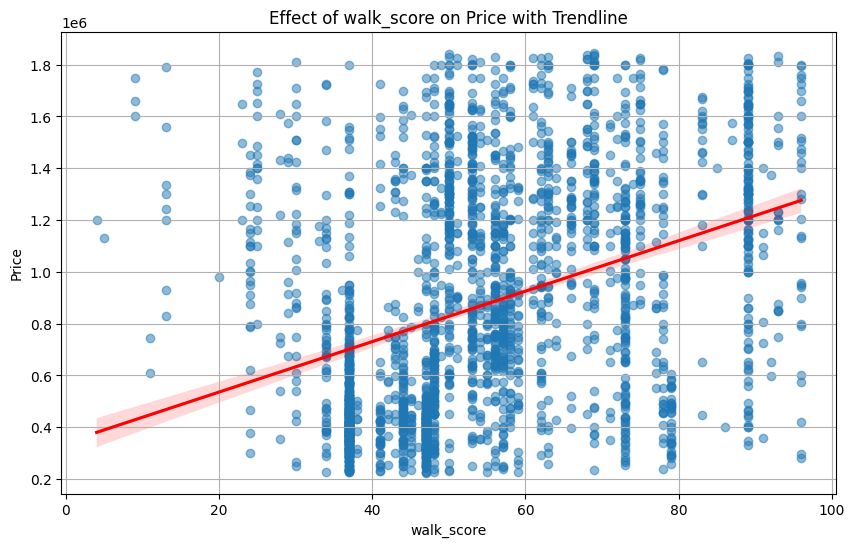

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


X = filtered_data.drop(columns=['price'])  # Features
y = filtered_data['price']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


feature_name = "walk_score"


# Create a scatter plot of the feature vs. price with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test[feature_name], y=y_test, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title(f'Effect of {feature_name} on Price with Trendline')
plt.xlabel(feature_name)
plt.ylabel('Price')
plt.grid(True)
plt.show()

<Figure size 1000x800 with 0 Axes>

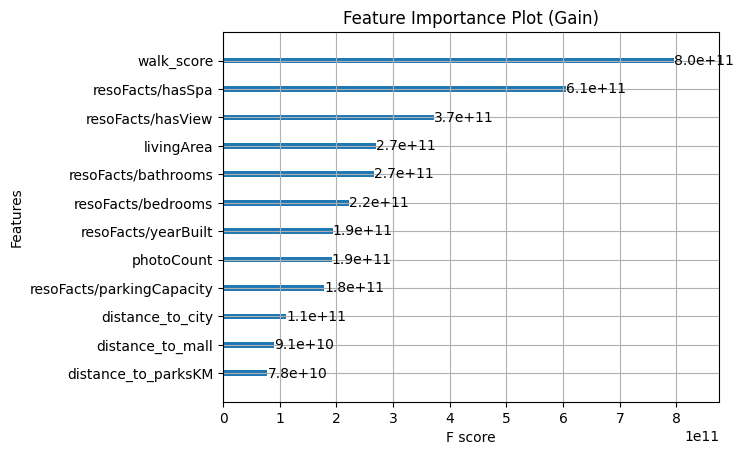

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

plt.figure(figsize=(10, 8))

# Plot the importance without automatic labels
ax = xgb.plot_importance(xgboost_model, importance_type='gain', show_values=False)
plt.title('Feature Importance Plot (Gain)')

# Manually add scientific notation labels for F-scores
for patch in ax.patches:
    # Get the width (value of F-score) of the bar
    width = patch.get_width()
    # Format the F-score value in scientific notation and set it as a label on the bar
    ax.text(width + 10, patch.get_y() + patch.get_height() / 2,
            f'{width:.1e}', va='center')

plt.show()

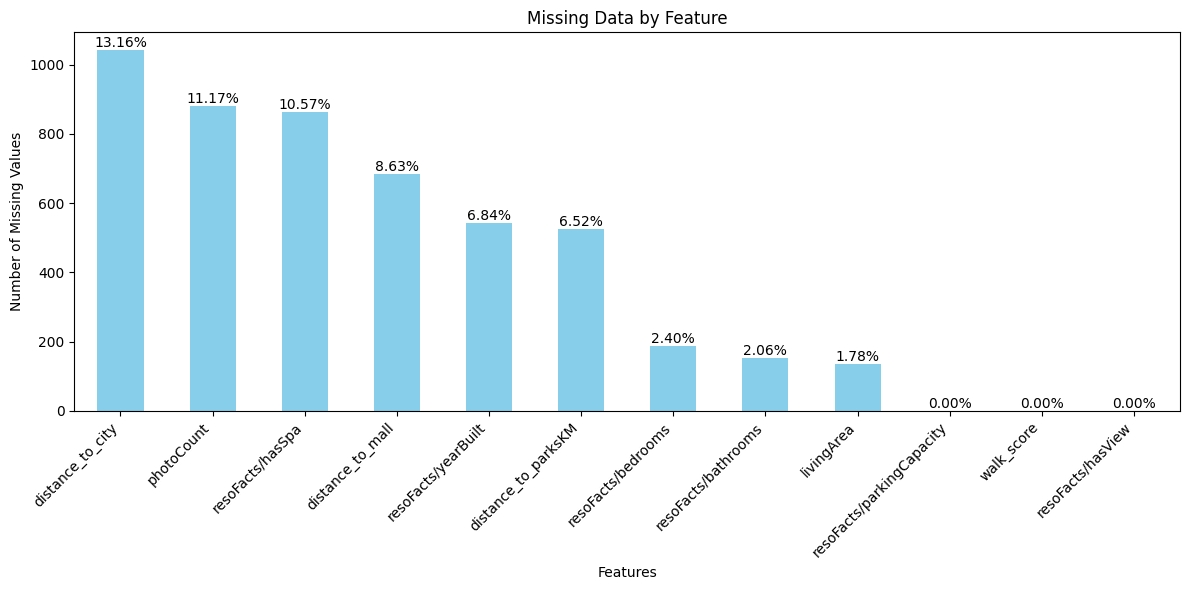

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the number of missing values for each column
missing_data = filtered_data.drop(columns=['price']).isnull().sum()

# Calculate the percentage of missing data for each column
missing_percentage = (X_train.isnull().sum() / len(X_train)) * 100

# Create a DataFrame with both counts and percentages
missing_summary = pd.DataFrame({'Missing Values': missing_data,
                                'Percentage (%)': missing_percentage})


# Plot the missing values, including features with no missing data
plt.figure(figsize=(12, 6))
missing_summary['Missing Values'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Missing Data by Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')

# Display the percentage on top of each bar, even for 0%
for i, value in enumerate(missing_summary['Missing Values'].sort_values(ascending=False)):
    plt.text(i, value, f'{missing_summary["Percentage (%)"].sort_values(ascending=False).values[i]:.2f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(xgboost_model, 'real_estate_model.pkl')

['real_estate_model.pkl']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRFRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

# Example model
xgb = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [3, 5,6],
    'learning_rate': [0.01, 0.1,0.125],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1]
}

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)

# Output the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
#this was for last projects validation set.

predicted_prices = xgboost_model.predict(final_data.drop(columns=['price']))

final_data['price'] = predicted_prices



df['price'] = predicted_prices

df.to_csv('lotwize_case_validation.csv',index=False)



In [ ]:
filtered_data.to_csv('FinalDataSet.csv', index=False)